# SVM FOR STOCK PRICE PREDICTION-(BULLISH STOCK MARKET CYCLE)
This script uses SVM to predict stock price in a Bullish Market Cycle

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [2]:
# Fetch data from Yahoo Finance
data = yf.download('^FTSE', start='2009-01-01', end='2015-06-30')
data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Specify the feature names and target variable
feature_names = ['Open', 'High', 'Low']
target = 'Close'
X = data[feature_names]
y = data[target]

In [4]:
# Split the dataset into training and testing sets
train_size = int(0.80 * y.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [5]:
# Scale the features
scaler_X = StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [6]:
# Initialize the SVR model
svr_model = SVR()

In [7]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

In [8]:
# Define the time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

In [9]:
# Initialize GridSearchCV
grid_search = GridSearchCV(svr_model, param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [10]:
# Fit the model
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=1)

In [11]:
# Print the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_}")

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 662.580259793002


In [12]:
# Predict using the best model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

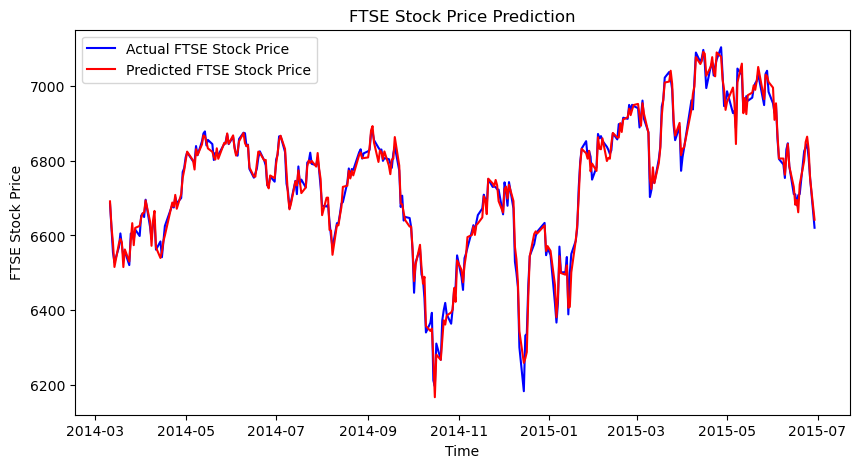

In [13]:
# Plot the actual and predicted prices
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, color='blue', label='Actual FTSE Stock Price')
plt.plot(y_test.index, y_pred, color='red', label='Predicted FTSE Stock Price')
plt.title('FTSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FTSE Stock Price')
plt.legend()
plt.show()

# EVALUATION METRICS
This metrics are used to evaluate the performance of the models compared. Cross validation is specifically included for more robust measure in comparing the various models performance.

In [14]:
# Compute and print evaluation metrics
# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 453.8069518026236


In [15]:
# Compute RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 21.302745170578923


In [16]:
# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Percentage Error: 0.23821815483726663%


In [17]:
# Time-Series Cross-Validation using the best model
cv_scores = cross_val_score(grid_search.best_estimator_, scaler_X.transform(X), y, cv=tscv)
print(f"Time Series Cross-validation scores: {cv_scores}")
print(f"Mean Time Series Cross-validation score: {np.mean(cv_scores)}")

Time Series Cross-validation scores: [0.99198928 0.98747258 0.99664912 0.98507138 0.98594845]
Mean Time Series Cross-validation score: 0.9894261618159476
